In [1]:
 %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = pd.read_csv("city_data.csv")
ride_data = pd.read_csv("ride_data.csv")

# Read the City and Ride Data
city_data.head()


# Combine the data into a single dataset

# Display the data table for preview

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2018 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2018 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2018 23:22,23.44,5.149250e+12
4,South Jack,3/6/2018 4:28,34.58,3.908450e+12


In [3]:
####crypto_df = pd.merge(bitcoin_df, dash_df, on="Date")
uber_df = pd.merge(city_data,ride_data, on ="city")
uber_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/2018 8:40,13.93,5.628550e+12
1,Richardfort,38,Urban,2/13/2018 12:46,14.00,9.100500e+11
2,Richardfort,38,Urban,2/16/2018 13:52,17.92,8.206390e+11
3,Richardfort,38,Urban,2/1/2018 20:18,10.26,9.554940e+12
4,Richardfort,38,Urban,4/17/2018 2:26,23.00,7.200210e+11


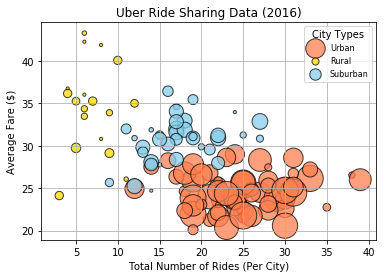

In [4]:
# create data
#x = np.random.rand(40)
#y = np.random.rand(40)
#z = np.random.rand(40)
#colors = np.random.rand(40) 
# use the scatter function
#plt.scatter(x, y, s=z*10000,c=colors) size 







#group data frames for each of the city types 
urban_city = uber_df[uber_df["type"] == "Urban"].groupby([uber_df["city"]])
rural_city = uber_df[uber_df["type"] == "Rural"].groupby([uber_df["city"]])
suburban_city = uber_df[uber_df["type"] == "Suburban"].groupby([uber_df["city"]])
#urban_city.head()

# Urban calculations of ride count (x), fare average(y), driver count average(s as in size, or diameter of bubble)
x_urban = urban_city["ride_id"].count()
y_urban = urban_city["fare"].mean()
s_urban = urban_city["driver_count"].mean()

# Rural calculations of ride count (x), fare average(y), driver count average(s as in size, or diameter of bubble)
x_rural = rural_city["ride_id"].count()
y_rural = rural_city["fare"].mean()
s_rural = rural_city["driver_count"].mean()

# Suburban calculations of ride count (x), fare average(y), driver count average(s as in size, or diamete of bubble)
x_suburban = suburban_city["ride_id"].count()
y_suburban = suburban_city["fare"].mean()
s_suburban = suburban_city["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, label = "Urban", s=s_urban * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s=s_rural * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=s_suburban  * 10, color=["skyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# label the graph 
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Uber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 


plt.show()


Text(0.5, 1.0, 'Percentage of Fares Per City Type')

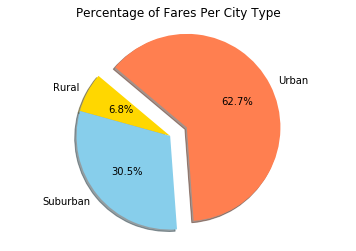

In [5]:
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       # autopct="%1.1f%%", shadow=True, startangle=140)

#group by type, and sum the fares 
uber_type = uber_df.groupby(['type'])
fares = uber_type['fare'].sum()
#create the pie chart, 
labels = ('Rural', 'Suburban', 'Urban')
colors = ["Gold","skyblue","coral"]
explode = (0,0,.2)
plt.pie(fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

plt.title("Percentage of Fares Per City Type")



Text(0.5, 1.0, 'Count of Rides per City Type')

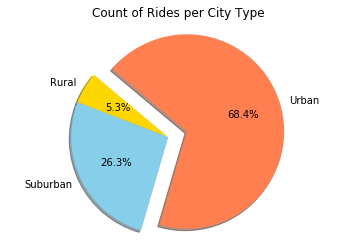

In [6]:
#total rides per city type 
rides = uber_type['type'].count()
#create pie chart 
labels = ('Rural', 'Suburban', 'Urban')
colors = ["Gold","Skyblue","coral"]
explode = (0,0,.2)
plt.pie(rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

plt.title("Count of Rides per City Type")

Text(0.5, 1.0, 'Number of Drivers per City Type')

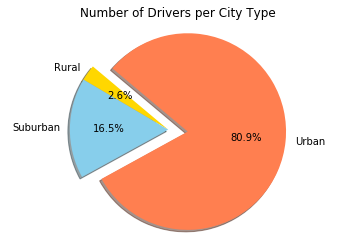

In [7]:
#total drivers by city type 
drivers_city = city_data.groupby(['type'])
drivers = drivers_city['driver_count'].sum()
labels = ('Rural', 'Suburban', 'Urban')
colors = ["Gold","Skyblue","Coral"]
explode = (0,0,.2)
plt.pie(drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

plt.title("Number of Drivers per City Type") 